Problem Statement

Locate any outliers in Kaggle's Ames House Price dataset.

Acknowledgments

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

Import Standard Libraries

In [195]:
#import libraries
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy as np
print('numpy: {}'.format(np.__version__))
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

Python: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.1.4
sklearn: 0.22.2.post1
seaborn: 0.11.0


Load training set

In [196]:
#Load datasets
train=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/House-Prices/master/train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [197]:
train.shape

(1460, 81)

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Load testing set

Describe the target variable

In [199]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

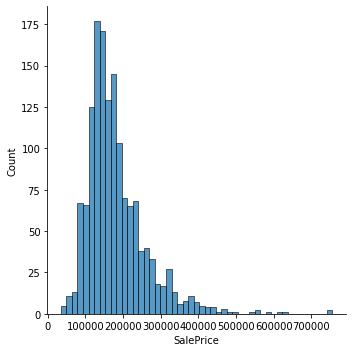

In [200]:
sns.displot(train['SalePrice']);

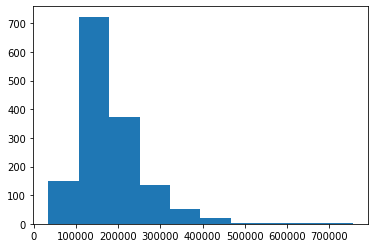

In [201]:
plt.hist(train['SalePrice'])
plt.show()

In [202]:
print("Skew of SalePrice: ", train.SalePrice.skew())

Skew of SalePrice:  1.8828757597682129


<function matplotlib.pyplot.show>

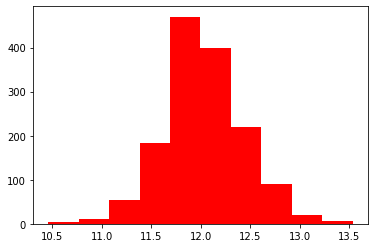

In [203]:
train['LT_SalePrice'] = np.log(train.SalePrice + 1)
plt.hist(train.LT_SalePrice, color='red')
plt.show

In [204]:
print("Skew of LT_SalePrice: ", train.LT_SalePrice.skew())

Skew of LT_SalePrice:  0.12134661989685329


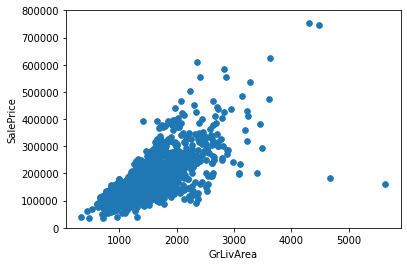

In [205]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

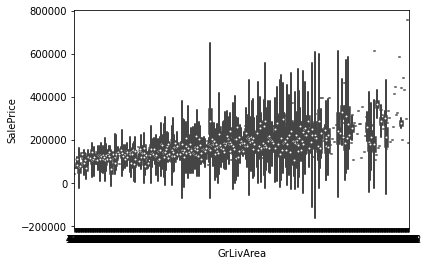

In [206]:
ax = sns.violinplot(x="GrLivArea", y="SalePrice", data=train)

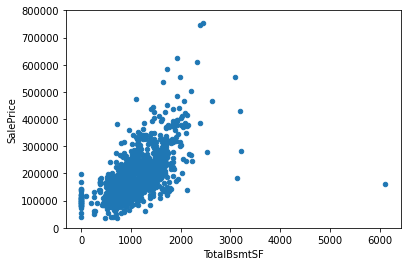

In [207]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

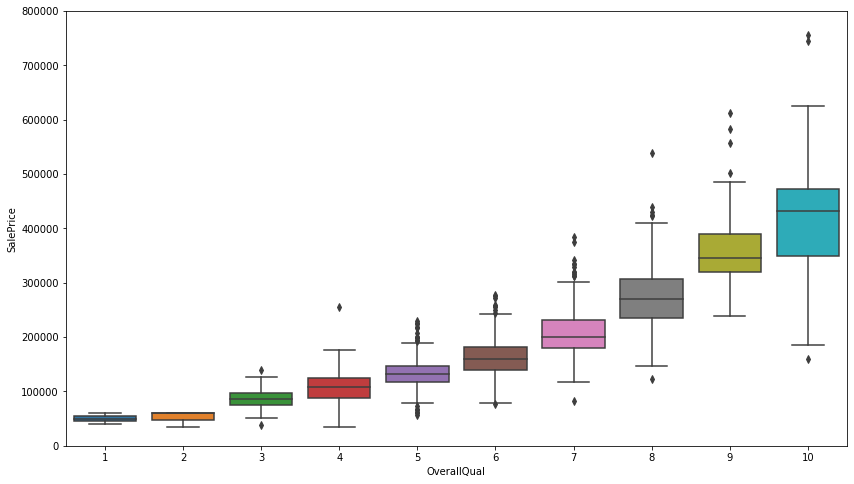

In [208]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

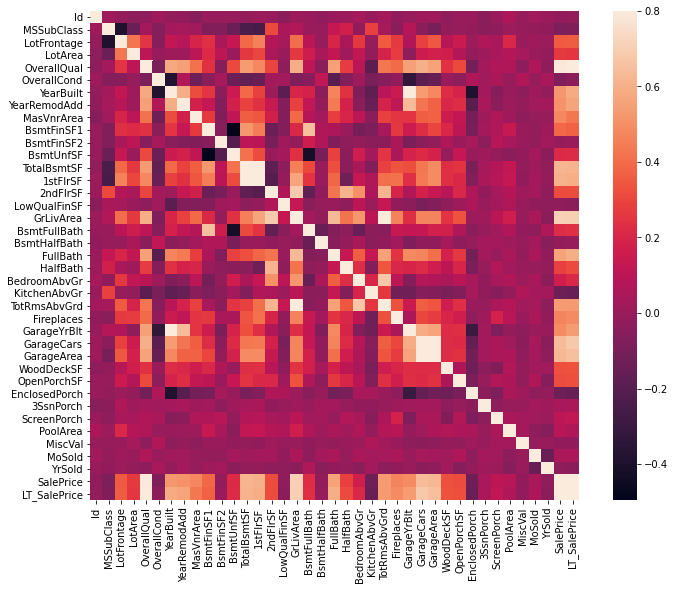

In [209]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Check for null values

In [210]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


Impute missing values

In [211]:
# fill up missing values with the not listed or median
train['MSZoning'] = train['MSZoning'].fillna('Not Listed')
train['Alley'] = train['Alley'].fillna('Not Listed')
train['Utilities'] = train['Utilities'].fillna('Not Listed')
train['Exterior1st'] = train['Exterior1st'].fillna('Not Listed')
train['Exterior2nd'] = train['Exterior2nd'].fillna('Not Listed')
train["MasVnrType"] = train["MasVnrType"].fillna('Not Listed')
train["MasVnrArea"] = train["MasVnrArea"].fillna(train['MasVnrArea'].median())
train['Electrical'] = train['Electrical'].fillna('Not Listed')
train['KitchenQual'] = train['KitchenQual'].fillna('Not Listed')
train['FireplaceQu'] = train['FireplaceQu'].fillna('Not Listed')
train['PoolQC'] = train['PoolQC'].fillna('Not Listed')
train['MiscFeature'] = train['MiscFeature'].fillna('Not Listed')
train['Fence'] = train['Fence'].fillna('Not Listed')
train['Functional'] = train['Functional'].fillna('Not Listed')
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())
train['SaleType'] = train['SaleType'].fillna('Not Listed')
train['GarageType'] = train['GarageType'].fillna('Not Listed')
train['GarageFinish'] = train['GarageFinish'].fillna('Not Listed')
train['GarageQual'] = train['GarageQual'].fillna('Not Listed')
train['GarageCond'] = train['GarageCond'].fillna('Not Listed')
train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(train['BsmtFinSF1'].median())
train['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(train['BsmtFinSF2'].median())

# for these columns, NA = No Basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
   train[col] = train[col].fillna('None')

   # for these columns, NA is likely to be 0 due to no basement
for col in ('BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
   train[col] = train[col].fillna(0)

# as there is no garage, NA value for this column is set to zero
for col in ('GarageArea', 'GarageCars', 'GarageYrBlt'):
    train[col] = train[col].fillna(0)

Check for any null values after imputing values

In [212]:
# checking for any null value left
train.isnull().sum().sum()

0

Print off list of columns that are objects

In [213]:
train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

Ordinal Encode columns that are objects

In [214]:
#ordinal encoder
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

train.MSZoning = enc.fit_transform(train.MSZoning.values.reshape(-1,1))
train.Street = enc.fit_transform(train.Street.values.reshape(-1,1))
train.Alley = enc.fit_transform(train.Alley.values.reshape(-1,1))
train.LotShape = enc.fit_transform(train.LotShape.values.reshape(-1,1))
train.LandContour = enc.fit_transform(train.LandContour.values.reshape(-1,1))
train.Utilities = enc.fit_transform(train.Utilities.values.reshape(-1,1))
train.LotConfig = enc.fit_transform(train.LotConfig.values.reshape(-1,1))
train.LandSlope = enc.fit_transform(train.LandSlope.values.reshape(-1,1))
train.Neighborhood = enc.fit_transform(train.Neighborhood.values.reshape(-1,1))
train.Condition1 = enc.fit_transform(train.Condition1.values.reshape(-1,1))
train.Condition2 = enc.fit_transform(train.Condition2.values.reshape(-1,1))
train.BldgType = enc.fit_transform(train.BldgType.values.reshape(-1,1))
train.HouseStyle = enc.fit_transform(train.HouseStyle.values.reshape(-1,1))
train.RoofStyle = enc.fit_transform(train.RoofStyle.values.reshape(-1,1))
train.RoofMatl = enc.fit_transform(train.RoofMatl.values.reshape(-1,1))
train.Exterior1st = enc.fit_transform(train.Exterior1st.values.reshape(-1,1))
train.Exterior2nd = enc.fit_transform(train.Exterior2nd.values.reshape(-1,1))
train.MasVnrType = enc.fit_transform(train.MasVnrType.values.reshape(-1,1))
train.ExterQual = enc.fit_transform(train.ExterQual.values.reshape(-1,1))
train.ExterCond = enc.fit_transform(train.ExterCond.values.reshape(-1,1))
train.Foundation = enc.fit_transform(train.Foundation.values.reshape(-1,1))
train.BsmtQual = enc.fit_transform(train.BsmtQual.values.reshape(-1,1))
train.BsmtCond = enc.fit_transform(train.BsmtCond.values.reshape(-1,1))
train.BsmtExposure = enc.fit_transform(train.BsmtExposure.values.reshape(-1,1))
train.BsmtFinType1 = enc.fit_transform(train.BsmtFinType1.values.reshape(-1,1))
train.BsmtFinSF1 = enc.fit_transform(train.BsmtFinSF1.values.reshape(-1,1))
train.BsmtFinType2 = enc.fit_transform(train.BsmtFinType2.values.reshape(-1,1))
train.BsmtFinSF2 = enc.fit_transform(train.BsmtFinSF2.values.reshape(-1,1))
train.Heating = enc.fit_transform(train.Heating.values.reshape(-1,1))
train.HeatingQC = enc.fit_transform(train.HeatingQC.values.reshape(-1,1))
train.CentralAir = enc.fit_transform(train.CentralAir.values.reshape(-1,1))
train.Electrical = enc.fit_transform(train.Electrical.values.reshape(-1,1))
train.KitchenQual = enc.fit_transform(train.KitchenQual.values.reshape(-1,1))
train.Functional = enc.fit_transform(train.Functional.values.reshape(-1,1))
train.FireplaceQu = enc.fit_transform(train.FireplaceQu.values.reshape(-1,1))
train.GarageType = enc.fit_transform(train.GarageType.values.reshape(-1,1))
train.GarageFinish = enc.fit_transform(train.GarageFinish.values.reshape(-1,1))
train.GarageQual = enc.fit_transform(train.GarageQual.values.reshape(-1,1))
train.GarageCond = enc.fit_transform(train.GarageCond.values.reshape(-1,1))
train.PavedDrive = enc.fit_transform(train.PavedDrive.values.reshape(-1,1))
train.PoolQC = enc.fit_transform(train.PoolQC.values.reshape(-1,1))
train.Fence = enc.fit_transform(train.Fence.values.reshape(-1,1))
train.MiscFeature = enc.fit_transform(train.MiscFeature.values.reshape(-1,1))
train.SaleType = enc.fit_transform(train.SaleType.values.reshape(-1,1))
train.SaleCondition = enc.fit_transform(train.SaleCondition.values.reshape(-1,1))

In [215]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   float64
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   float64
 6   Alley          1460 non-null   float64
 7   LotShape       1460 non-null   float64
 8   LandContour    1460 non-null   float64
 9   Utilities      1460 non-null   float64
 10  LotConfig      1460 non-null   float64
 11  LandSlope      1460 non-null   float64
 12  Neighborhood   1460 non-null   float64
 13  Condition1     1460 non-null   float64
 14  Condition2     1460 non-null   float64
 15  BldgType       1460 non-null   float64
 16  HouseStyle     1460 non-null   float64
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Define X, y and X_test variables

In [216]:
y = train.SalePrice.values

X = train.drop(['LT_SalePrice', 'SalePrice', 'Id', 'Alley', 'FireplaceQu', 'GarageType', 'PoolQC', 'MiscFeature', 
                   'MSSubClass', 'LotFrontage', 'LotArea', 'LandContour', 'Condition2', 'BldgType', 'BsmtFinType2',
                   'TotRmsAbvGrd', 'Functional', 'Fence'], axis = 1)

In [217]:
X.shape

(1460, 64)

Split train dataset for testing and training

In [218]:
from sklearn.model_selection import train_test_split

# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
X_train.shape, X_val.shape, y_train.shape,y_val.shape

((1314, 64), (146, 64), (1314,), (146,))

Make pipeline

In [219]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(StandardScaler(), 
                      GradientBoostingRegressor(random_state=0, n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=.1, loss='ls'))
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

0.9995599904904364


Make predictions

In [220]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

0.9520610585957595
0.9999999999581172


(None, None)

In [221]:
y_pred

array([209499, 174367, 118801,  76427, 131835, 363078, 301469, 150083,
       231744, 233501, 186824,  77975, 216230, 408334, 250991, 111631,
       110377, 115660, 226841, 116553, 126285, 115875, 255487, 329139,
        93156, 210881, 133249, 188523, 529211, 130544, 114470, 124073,
       124609,  77073, 140240, 368119, 124670,  90569, 265794, 109223,
       128968, 136719,  88838, 114275, 165682, 168356, 129553, 175725,
       259520, 262814,  99226, 287513, 115209, 235644, 195442, 102322,
       120950, 176566, 123200, 173136, 162716, 287354,  86760, 129110,
       171979, 130613, 128454, 205239, 148933, 152357, 182936, 114756,
       334918, 162782, 170270, 216219, 164494, 139308, 407986, 197159,
       180389, 145501, 132361, 144359, 178298, 145200, 165798, 165302,
       190808, 163104, 188498, 176573, 101201, 102641, 120310, 126494,
       115567, 135583, 154434, 139976, 180040, 140660, 112387, 108516,
       134275, 154616, 174125, 191011, 137297, 319504, 158077, 184048,
      

In [222]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
0,231500,209499
1,179500,174367
2,122000,118801
3,84500,76427
4,142000,131835
...,...,...
141,272000,251102
142,176500,187384
143,234000,197438
144,40000,82812


Look for outliers

Define model

In [223]:
from sklearn.ensemble import IsolationForest

model=IsolationForest(n_estimators=400, max_samples='auto', contamination=float(0.01),max_features=1.0)
model.fit(train[['SalePrice']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=400,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [224]:
train['scores']=model.decision_function(train[['SalePrice']])
train['anomaly']=model.predict(train[['SalePrice']])
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LT_SalePrice,scores,anomaly
0,1,60,3.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2003,2003,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,361.0,6.0,0.0,150,856,1.0,...,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2003.0,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,3.0,4.0,1.0,0,2,2008,8.0,4.0,208500,12.247699,0.254339,1
1,2,20,3.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,8,1976,1976,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,482.0,6.0,0.0,284,1262,1.0,...,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,5.0,1.0,1976.0,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,3.0,4.0,1.0,0,5,2007,8.0,4.0,181500,12.109016,0.285782,1
2,3,60,3.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,5,2001,2002,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,222.0,6.0,0.0,434,920,1.0,...,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2001.0,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,3.0,4.0,1.0,0,9,2008,8.0,4.0,223500,12.317171,0.251594,1
3,4,70,3.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,1915,1970,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,4.0,1.0,3.0,0.0,66.0,6.0,0.0,540,756,1.0,...,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,1998.0,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,3.0,4.0,1.0,0,2,2006,8.0,0.0,140000,11.849405,0.306533,1
4,5,60,3.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,5,2000,2000,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,328.0,6.0,0.0,490,1145,1.0,...,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,5.0,1.0,2000.0,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,3.0,4.0,1.0,0,12,2008,8.0,4.0,250000,12.429220,0.228573,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3.0,62.0,7917,1.0,1.0,3.0,3.0,0.0,4.0,0.0,8.0,2.0,2.0,0.0,5.0,6,5,1999,2000,1.0,1.0,12.0,13.0,2.0,0.0,3.0,4.0,2.0,2.0,4.0,3.0,6.0,0.0,6.0,0.0,953,953,1.0,...,694,0,1647,0,0,2,1,3,1,3.0,7,6.0,1,5.0,1.0,1999.0,2.0,2,460,5.0,5.0,2.0,0,40,0,0,0,0,3.0,4.0,1.0,0,8,2007,8.0,4.0,175000,12.072547,0.292537,1
1456,1457,20,3.0,85.0,13175,1.0,1.0,3.0,3.0,0.0,4.0,0.0,14.0,2.0,2.0,0.0,2.0,6,6,1978,1988,1.0,1.0,9.0,10.0,4.0,119.0,3.0,4.0,1.0,2.0,4.0,3.0,0.0,407.0,5.0,29.0,589,1542,1.0,...,0,0,2073,1,0,2,0,3,1,3.0,7,2.0,2,5.0,1.0,1978.0,3.0,2,500,5.0,5.0,2.0,349,0,0,0,0,0,3.0,2.0,1.0,0,2,2010,8.0,4.0,210000,12.254868,0.255735,1
1457,1458,70,3.0,66.0,9042,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,5.0,7,9,1941,2006,1.0,1.0,5.0,5.0,2.0,0.0,0.0,2.0,4.0,4.0,1.0,3.0,2.0,95.0,6.0,0.0,877,1152,1.0,...,1152,0,2340,0,0,2,0,4,1,2.0,9,6.0,2,2.0,1.0,1941.0,2.0,1,252,5.0,5.0,2.0,0,60,0,0,0,0,3.0,0.0,3.0,2500,5,2010,8.0,4.0,266500,12.493133,0.213800,1
1458,1459,20,3.0,68.0,9717,1.0,1.0,3.0,3.0,0.0,4.0,0.0,12.0,2.0,2.0,0.0,2.0,5,6,1950,1996,3.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,4.0,4.0,2.0,2.0,14.0,5.0,134.0,0,1078,1.0,...,0,0,1078,1,0,1,0,2,1,2.0,5,6.0,0,3.0,1.0,1950.0,3.0,1,240,5.0,5.0,2.0,366,0,112,0,0,0,3.0,4.0,1.0,0,4,2010,8.0,4.0,142125,11.864469,0.296820,1


In [225]:
anomaly=train.loc[train['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

        Id  MSSubClass  MSZoning  ...  LT_SalePrice    scores  anomaly
178    179          20       3.0  ...     13.126033 -0.036513       -1
185    186          75       4.0  ...     13.071072 -0.014510       -1
440    441          20       3.0  ...     13.226725 -0.070462       -1
495    496          30       0.0  ...     10.460271 -0.003115       -1
691    692          60       3.0  ...     13.534474 -0.116423       -1
769    770          60       3.0  ...     13.195616 -0.061183       -1
798    799          60       3.0  ...     13.091906 -0.022857       -1
803    804          60       3.0  ...     13.275829 -0.082555       -1
898    899          20       3.0  ...     13.323929 -0.093323       -1
916    917          20       0.0  ...     10.471978 -0.002993       -1
1046  1047          60       3.0  ...     13.229570 -0.071530       -1
1169  1170          60       3.0  ...     13.345509 -0.095521       -1
1182  1183          60       3.0  ...     13.521141 -0.113887       -1
1243  

In [226]:
outliers_counter = len(train[train['SalePrice'] > 500000])
outliers_counter

9

In [227]:
train[train.SalePrice > 500000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LT_SalePrice,scores,anomaly
178,179,20,3.0,63.0,17423,1.0,1.0,0.0,3.0,0.0,1.0,0.0,22.0,2.0,2.0,0.0,2.0,9,5,2008,2009,3.0,1.0,12.0,13.0,4.0,748.0,0.0,4.0,2.0,0.0,4.0,3.0,2.0,632.0,6.0,0.0,312,2216,1.0,...,0,0,2234,1,0,2,0,1,1,0.0,9,6.0,1,2.0,1.0,2009.0,0.0,3,1166,5.0,5.0,2.0,0,60,0,0,0,0,3.0,4.0,1.0,0,7,2009,6.0,5.0,501837,13.126033,-0.036513,-1
440,441,20,3.0,105.0,15431,1.0,1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,0.0,2.0,10,5,2008,2008,3.0,1.0,12.0,13.0,4.0,200.0,0.0,4.0,2.0,0.0,4.0,1.0,2.0,629.0,0.0,99.0,788,3094,1.0,...,0,0,2402,1,0,2,0,2,1,0.0,10,6.0,2,2.0,1.0,2008.0,0.0,3,672,5.0,5.0,2.0,0,72,0,0,170,0,3.0,4.0,1.0,0,4,2009,8.0,4.0,555000,13.226725,-0.070462,-1
691,692,60,3.0,104.0,21535,1.0,1.0,0.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,5.0,10,6,1994,1995,1.0,7.0,6.0,6.0,1.0,1170.0,0.0,4.0,2.0,0.0,4.0,1.0,2.0,611.0,6.0,0.0,989,2444,1.0,...,1872,0,4316,0,1,3,1,4,1,0.0,10,6.0,2,0.0,1.0,1994.0,0.0,3,832,5.0,5.0,2.0,382,50,0,0,0,0,3.0,4.0,1.0,0,1,2007,8.0,4.0,755000,13.534474,-0.116423,-1
769,770,60,3.0,47.0,53504,1.0,1.0,1.0,1.0,0.0,1.0,1.0,22.0,2.0,2.0,0.0,5.0,8,5,2003,2003,3.0,1.0,5.0,15.0,1.0,603.0,0.0,4.0,2.0,2.0,4.0,1.0,0.0,603.0,6.0,0.0,234,1650,1.0,...,1589,0,3279,1,0,3,1,4,1,0.0,12,4.0,1,2.0,3.0,2003.0,0.0,3,841,5.0,5.0,2.0,503,36,0,0,210,0,3.0,4.0,1.0,0,6,2010,8.0,4.0,538000,13.195616,-0.061183,-1
803,804,60,3.0,107.0,13891,1.0,1.0,3.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,0.0,5.0,9,5,2008,2009,3.0,1.0,12.0,13.0,4.0,424.0,0.0,4.0,2.0,0.0,4.0,1.0,6.0,0.0,6.0,0.0,1734,1734,1.0,...,1088,0,2822,0,0,3,1,4,1,0.0,12,6.0,1,2.0,3.0,2009.0,2.0,3,1020,5.0,5.0,2.0,52,170,0,0,192,0,3.0,4.0,1.0,0,1,2009,6.0,5.0,582933,13.275829,-0.082555,-1
898,899,20,3.0,100.0,12919,1.0,1.0,0.0,3.0,0.0,4.0,0.0,16.0,2.0,2.0,0.0,2.0,9,5,2009,2010,3.0,1.0,12.0,13.0,4.0,760.0,0.0,4.0,2.0,0.0,4.0,1.0,2.0,634.0,6.0,0.0,142,2330,1.0,...,0,0,2364,1,0,2,1,2,1,0.0,11,6.0,2,2.0,1.0,2009.0,0.0,3,820,5.0,5.0,2.0,0,67,0,0,0,0,3.0,4.0,1.0,0,3,2010,6.0,5.0,611657,13.323929,-0.093323,-1
1046,1047,60,3.0,85.0,16056,1.0,1.0,0.0,3.0,0.0,4.0,0.0,22.0,2.0,2.0,0.0,5.0,9,5,2005,2006,3.0,1.0,5.0,5.0,4.0,208.0,2.0,4.0,2.0,0.0,4.0,0.0,2.0,79.0,6.0,0.0,1752,1992,1.0,...,876,0,2868,0,0,3,1,4,1,0.0,11,6.0,1,2.0,3.0,2005.0,0.0,3,716,5.0,5.0,2.0,214,108,0,0,0,0,3.0,4.0,1.0,0,7,2006,6.0,5.0,556581,13.229570,-0.071530,-1
1169,1170,60,3.0,118.0,35760,1.0,1.0,0.0,3.0,0.0,1.0,0.0,15.0,2.0,2.0,0.0,5.0,10,5,1995,1996,3.0,1.0,6.0,6.0,1.0,1378.0,2.0,2.0,2.0,0.0,4.0,1.0,2.0,597.0,6.0,0.0,543,1930,1.0,...,1796,0,3627,1,0,3,1,4,1,2.0,10,6.0,1,5.0,1.0,1995.0,0.0,3,807,5.0,5.0,2.0,361,76,0,0,0,0,3.0,4.0,1.0,0,7,2006,8.0,4.0,625000,13.345509,-0.095521,-1
1182,1183,60,3.0,160.0,15623,1.0,1.0,0.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,5.0,10,5,1996,1996,3.0,1.0,13.0,7.0,2.0,0.0,2.0,4.0,2.0,0.0,4.0,0.0,2.0,633.0,6.0,0.0,300,2396,1.0,...,2065,0,4476,1,0,3,1,4,1,0.0,10,6.0,2,5.0,1.0,1996.0,0.0,3,813,5.0,5.0,2.0,171,78,0,0,0,555,0.0,2.0,1.0,0,7,2007,8.0,0.0,745000,13.521141,-0.113887,-1


In [228]:
print("Accuracy percentage:", 100*list(train['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 166.66666666666666
